In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [118]:
df = pd.read_csv('churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [119]:
df.shape

(3333, 21)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [121]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [122]:
df.duplicated().sum()

0

In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


<AxesSubplot:>

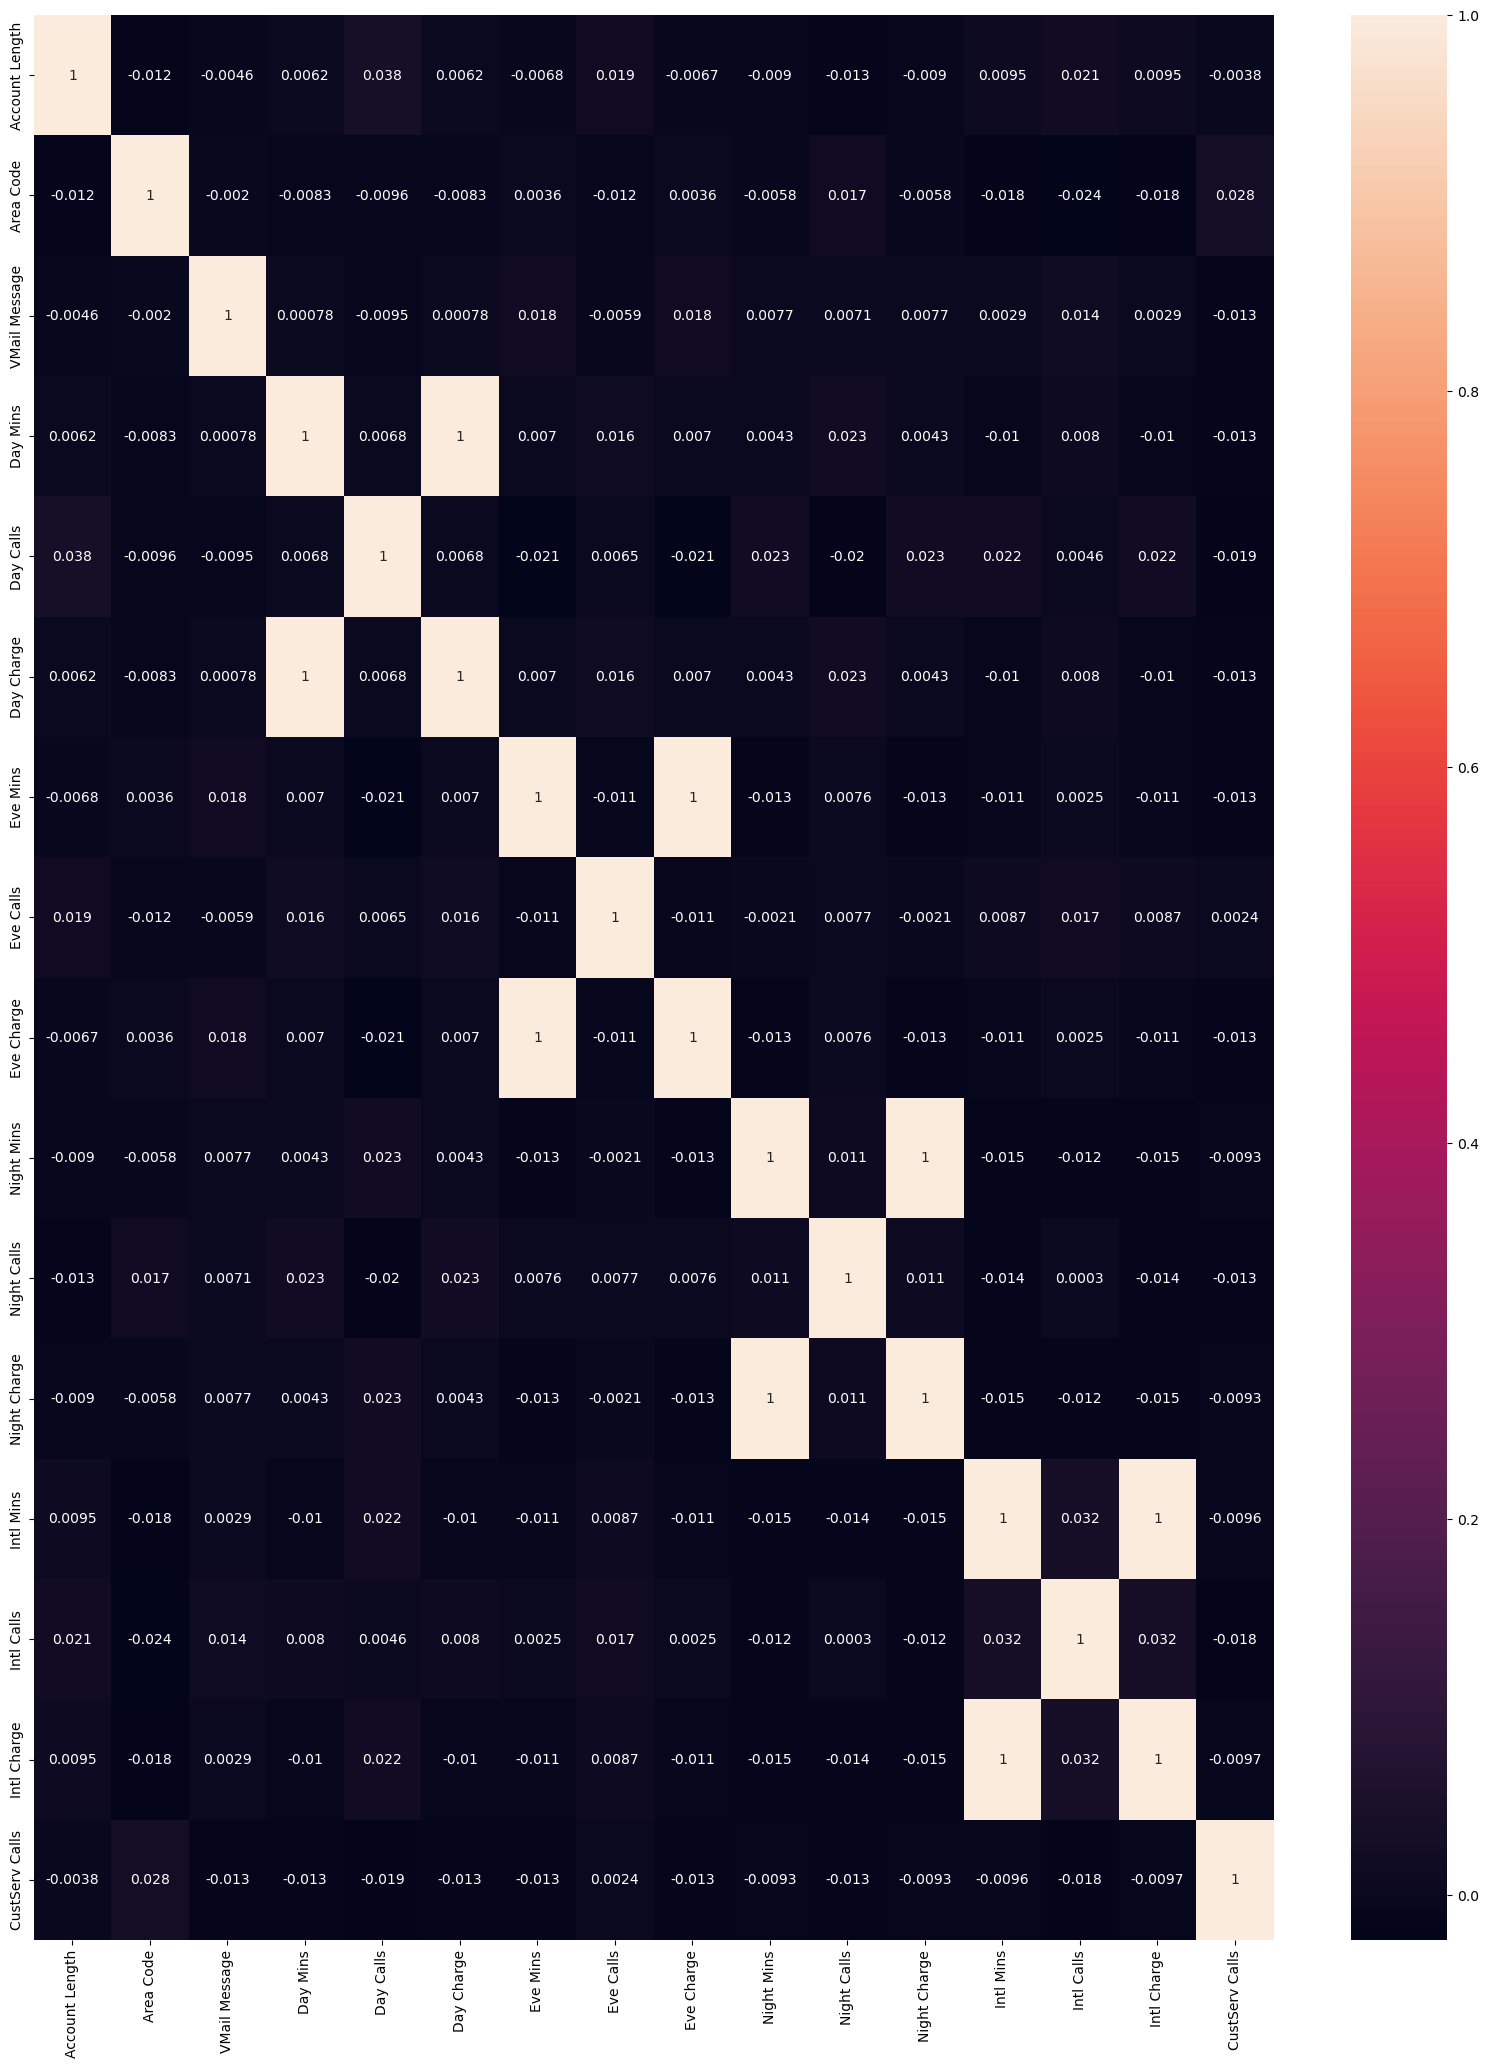

In [124]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)

In [125]:
df.drop(['Phone','State','Day Mins','Eve Mins','Night Mins','Intl Mins'],axis=1,inplace =True)

In [126]:
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False.
1,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False.
2,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False.
3,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False.
4,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False.


In [127]:
df.columns

Index(['Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge',
       'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [128]:
df['Int\'l Plan'].replace('yes',1,inplace=True)
df['Int\'l Plan'].replace('no',0,inplace=True)

In [129]:
df['VMail Plan'].replace('yes',1,inplace=True)
df['VMail Plan'].replace('no',0,inplace=True)

In [130]:
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False.
1,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False.
2,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False.
3,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False.
4,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False.


In [131]:
churns = len(df.loc[df['Churn?'] == 'True.'])
no_churns = len(df.loc[df['Churn?'] == 'False.'])
churns_perc = round(len(df.loc[df['Churn?'] == 'True.'])/len(df)*100,1)
no_churns_perc = round(len(df.loc[df['Churn?'] == 'False.'])/len(df)*100,1)

print('Churns: {} ({}%)'.format(churns, churns_perc))
print('No Churns: {} ({}%)'.format(no_churns, no_churns_perc))

Churns: 483 (14.5%)
No Churns: 2850 (85.5%)


In [132]:
df['Churn?'].replace('True.',1,inplace=True)
df['Churn?'].replace('False.',0,inplace=True)

<AxesSubplot:xlabel='Churn?', ylabel='Count'>

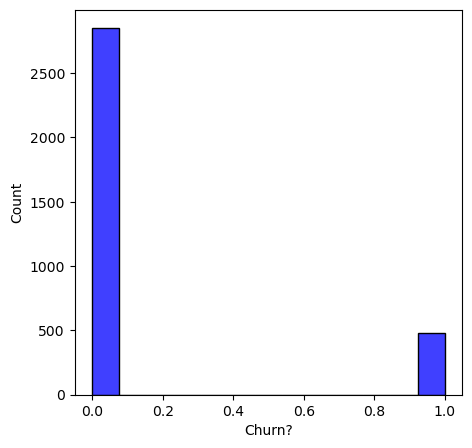

In [133]:
plt.figure(figsize=(5, 5))
sns.histplot(df['Churn?'], color= 'blue')

In [134]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn?',axis=1), 
           df['Churn?'], test_size=0.20, 
            random_state=101)

## Modelling

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [137]:
predicted = NBmodel.predict(X_test)

In [138]:
#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [139]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [140]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )

Confusion Matrix for Naive Bayes:
 [[536  49]
 [ 44  38]]


In [141]:
print('Accuracy Score for Naive Bayes:',score2 )

Accuracy Score for Naive Bayes: 0.8605697151424287


In [142]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       585
           1       0.44      0.46      0.45        82

    accuracy                           0.86       667
   macro avg       0.68      0.69      0.68       667
weighted avg       0.86      0.86      0.86       667



In [143]:
print('Auc Score for Naive Bayes:',auc2 )

Auc Score for Naive Bayes: 0.6898269751928288


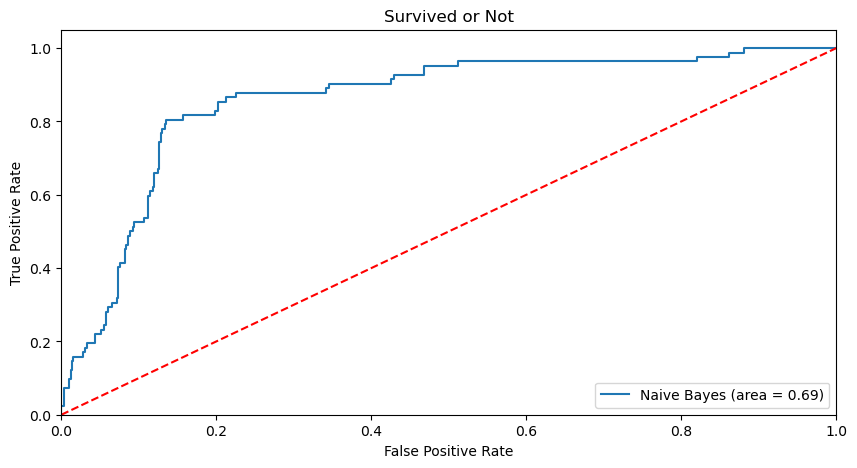

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()